In [1]:
import numpy as np
import os, glob
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.firamath])
import pickle, glob
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
channel_list = ["Tracks_pt", "Tracks_dZSig", "Tracks_d0Sig", "ECAL_energy",
"HBHE_energy", "Pix_1", "Pix_2", "Pix_3", "Pix_4", "Tib_1", "Tib_2",
"Tib_3", "Tib_4", "Tob_1", "Tob_2", "Tob_3", "Tob_4", "Tob_5",
"Tob_6", "Tid_1", "Tec_1", "Tec_2", "Tec_3"]
# %matplotlib notebook
from scipy.stats import norm
# Define the CMS color scheme
cms_colors = [
    (0.00, '#FFFFFF'),  # White
    (0.33, '#005EB8'),  # Blue
    (0.66, '#FFDD00'),  # Yellow
    (1.00, '#FF0000')   # red
]

# Create the CMS colormap
cms_cmap = LinearSegmentedColormap.from_list('CMS', cms_colors)
import math

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

m0_scale    = 14
m0_min      = 3.6
m0_max      = 14.8
mtrue_bins = np.arange(m0_min, m0_max, .4)
mae_min  =0
mae_max  = 10.5
mae_bins = np.arange(mae_min, mae_max, .5)
mre_bins = np.arange(0, 1.05, .05)
mass_bins = np.arange(3600,14000,400)/1000.

out_dir='plots'
if not os.path.isdir(out_dir):
    os.makedirs(out_dir)
save = True

In [3]:
valid_data_path_ResNet_BN_B3_with_eta_phi='/pscratch/sd/b/bbbam/ResNet_BN_B3_ieta_iphi_Nodes_4.0/13_channels_massregressor_multi_node_inference_Mass_1p2To18_2024_12_06_23:03:12_GPUS_4/test_data_epoch_300_M1p2To18'


### Testing each epochs

['/pscratch/sd/b/bbbam/ResNet_BN_B3_ieta_iphi_Nodes_4.0/13_channels_massregressor_multi_node_inference_Mass_1p2To18_2024_12_06_23:03:12_GPUS_4/test_data_epoch_300_M1p2To18/Inference_data_test_rank_3_epoch_300_M1p2To18.pkl', '/pscratch/sd/b/bbbam/ResNet_BN_B3_ieta_iphi_Nodes_4.0/13_channels_massregressor_multi_node_inference_Mass_1p2To18_2024_12_06_23:03:12_GPUS_4/test_data_epoch_300_M1p2To18/Inference_data_test_rank_1_epoch_300_M1p2To18.pkl', '/pscratch/sd/b/bbbam/ResNet_BN_B3_ieta_iphi_Nodes_4.0/13_channels_massregressor_multi_node_inference_Mass_1p2To18_2024_12_06_23:03:12_GPUS_4/test_data_epoch_300_M1p2To18/Inference_data_test_rank_0_epoch_300_M1p2To18.pkl', '/pscratch/sd/b/bbbam/ResNet_BN_B3_ieta_iphi_Nodes_4.0/13_channels_massregressor_multi_node_inference_Mass_1p2To18_2024_12_06_23:03:12_GPUS_4/test_data_epoch_300_M1p2To18/Inference_data_test_rank_2_epoch_300_M1p2To18.pkl']


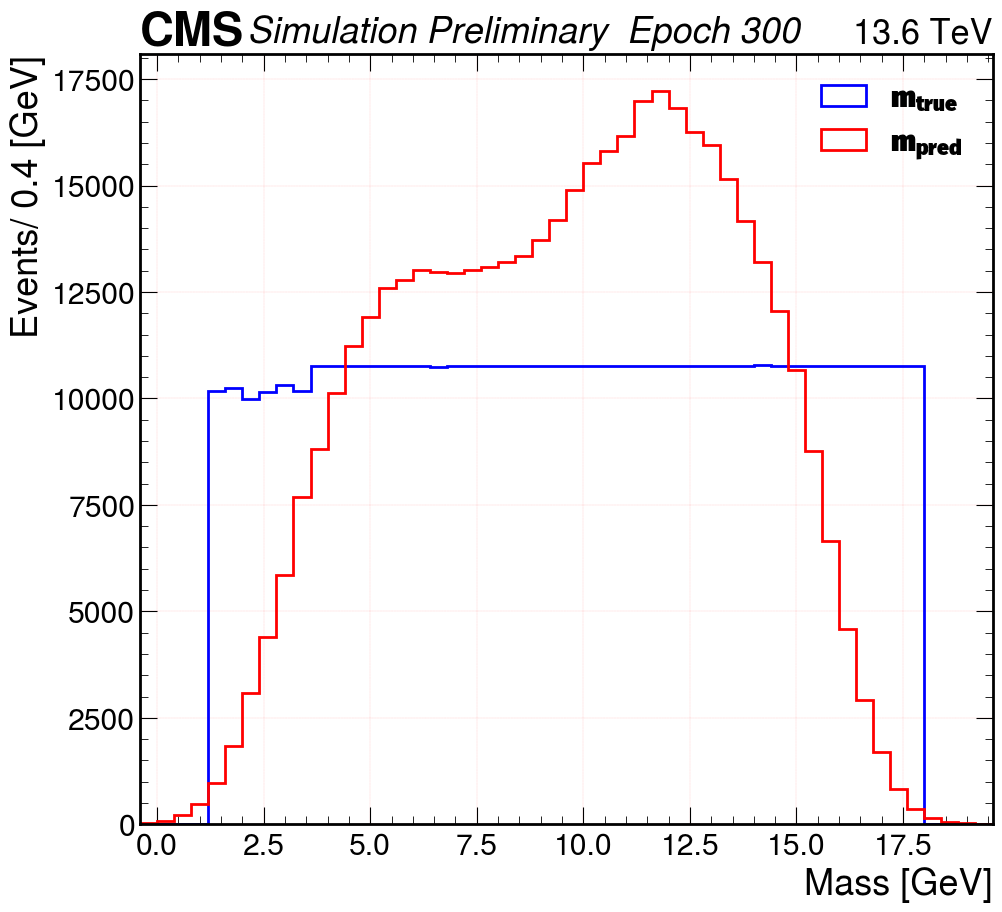

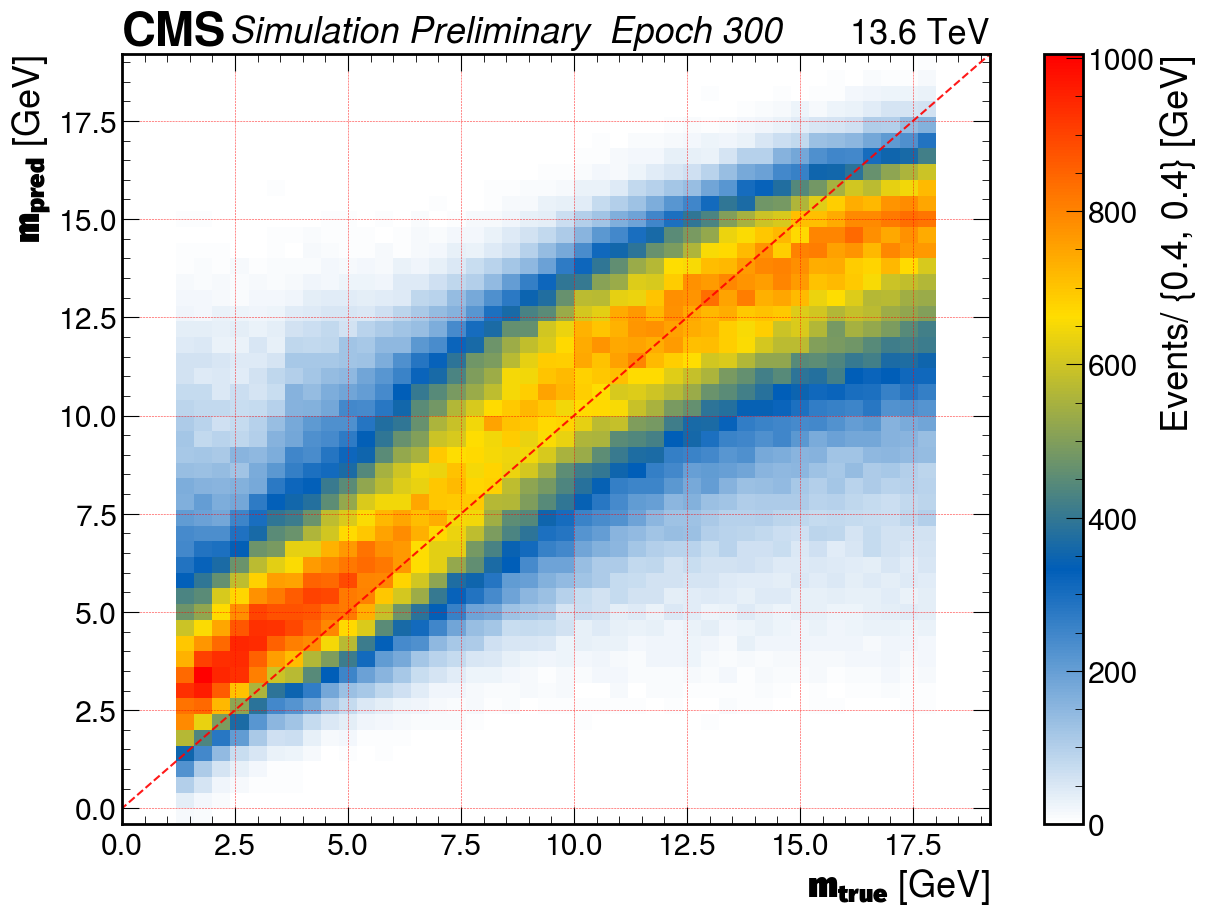

In [8]:
epoch = 300
m_true_, m_pred_ = [], []
data_files = glob.glob(f"{valid_data_path_ResNet_BN_B3_with_eta_phi}/Inference_data_test_rank_*_epoch_{epoch}_*.pkl")
print(data_files)
for file in data_files:
    infile = open(f"{file}", "rb")
    data = pickle.load(infile)
    infile.close()

    m_true_.append(data["m_true"])
    m_pred_.append(data["m_pred"])


m_true_ = np.concatenate(m_true_)
m_pred_ = np.concatenate(m_pred_)
m0_min = 0.8
m0_max = 18.4
bin_size = 0.4
fig, ax = plt.subplots(figsize=(11,10))
plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2)
plt.xlim(m0_min-1.2,m0_max+1.2)
# plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,.8),)
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel=f"Simulation Preliminary  Epoch {epoch}", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()



# Extended version
fig, ax = plt.subplots(figsize=(14,10))
plt.hist2d(np.squeeze(m_true_), np.squeeze(m_pred_), bins=[np.arange(m0_min-0.8, m0_max+1.2, .4), np.arange(m0_min-1.2, m0_max+1.2, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{true}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
# plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=15)
# plt.yticks(np.arange(m0_min-1.2, m0_max+1.2, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
plt.grid(color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel=f"Simulation Preliminary  Epoch {epoch}", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()



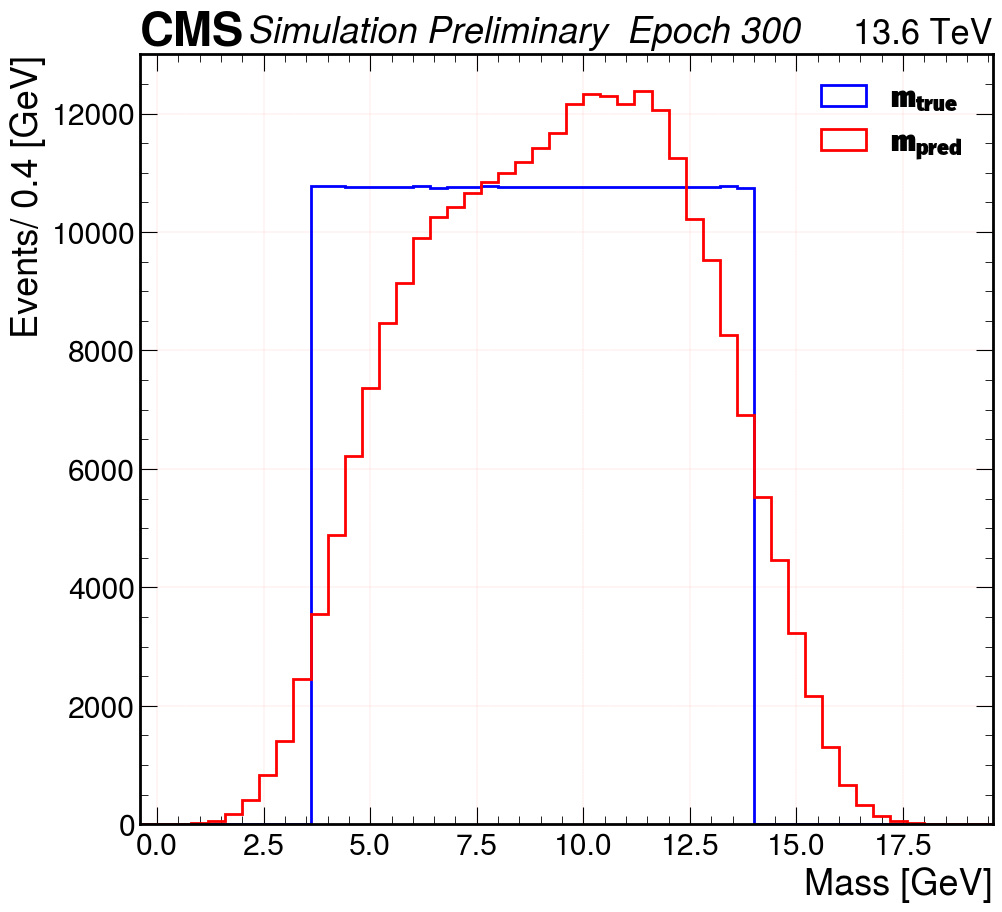

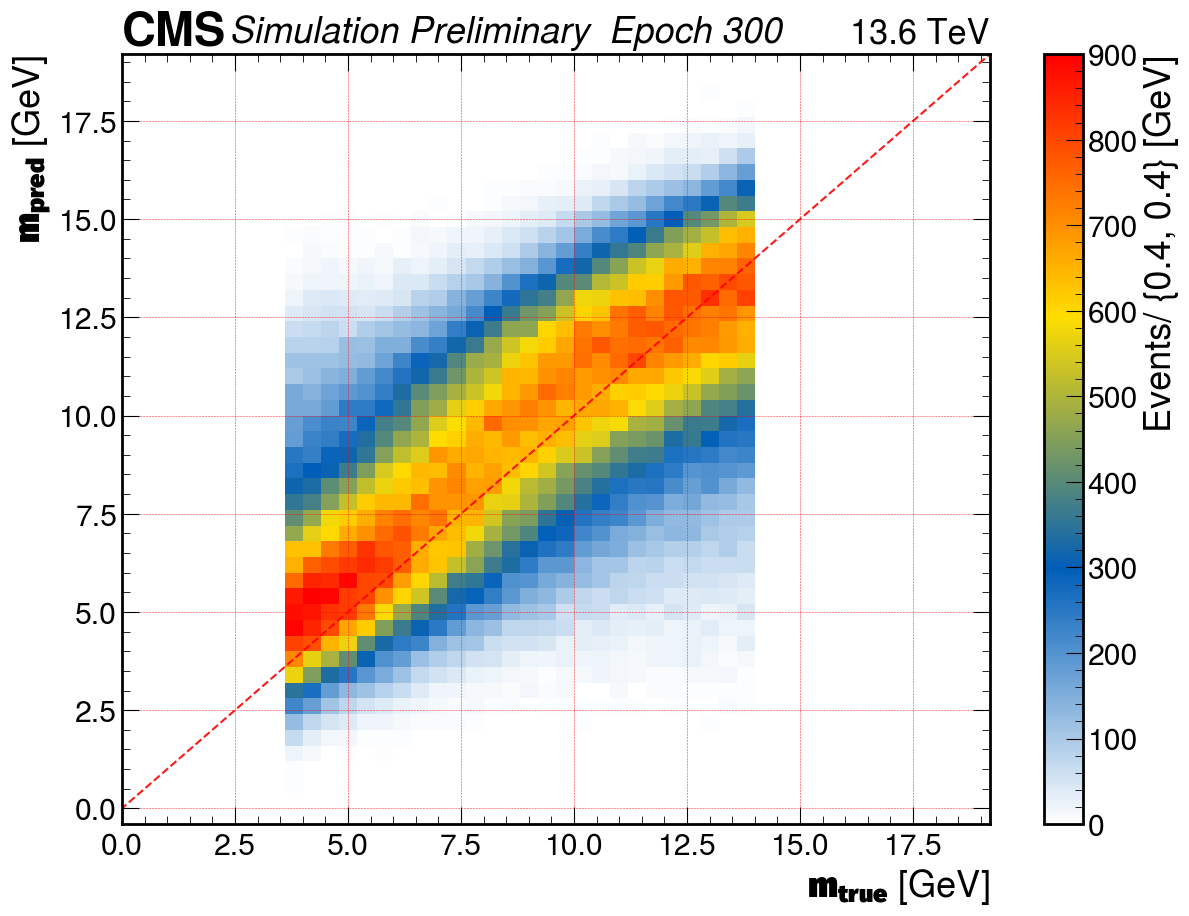

In [9]:
m_true_mask = (m_true_ >= 3.6) & (m_true_ <= 14)
m_true_ = m_true_[m_true_mask]
m_pred_ = m_pred_[m_true_mask]
m0_min = 0.8
m0_max = 18.4
bin_size = 0.4
fig, ax = plt.subplots(figsize=(11,10))
plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2)
plt.xlim(m0_min-1.2,m0_max+1.2)
# plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,.8),)
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel=f"Simulation Preliminary  Epoch {epoch}", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()



# Extended version
fig, ax = plt.subplots(figsize=(14,10))
plt.hist2d(np.squeeze(m_true_), np.squeeze(m_pred_), bins=[np.arange(m0_min-0.8, m0_max+1.2, .4), np.arange(m0_min-1.2, m0_max+1.2, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{true}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
# plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=15)
# plt.yticks(np.arange(m0_min-1.2, m0_max+1.2, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
plt.grid(color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel=f"Simulation Preliminary  Epoch {epoch}", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()


### Testing on signal 

In [14]:
# signal_M3p7_data_path_ResNet_BN_B3_with_eta_phi='/pscratch/sd/b/bbbam/ResNet_B3_with_ieta_iphi_Nodes_4.0/13_channels_massregressor_multi_node_inference_Mass_3p7_2024_12_16_02:04:32_GPUS_4/test_data_epoch_300_M3p7'
# signal_M14_data_path_ResNet_BN_B3_with_eta_phi='/pscratch/sd/b/bbbam/ResNet_B3_with_ieta_iphi_Nodes_4.0/13_channels_massregressor_multi_node_inference_Mass_14_2024_12_16_02:03:22_GPUS_4/test_data_epoch_300_M14'
signal_M3p7_data_path_ResNet_BN_B3_no_eta_phi='/pscratch/sd/b/bbbam/ResNet_B3_no_iphi_ieta_Nodes_4.0/13_channels_massregressor_multi_node_inference_Mass_14_2024_12_16_02:03:19_GPUS_4/test_data_epoch_300_M3p7'
# signal_M14_data_path_ResNet_BN_B3_no_eta_phi='/pscratch/sd/b/bbbam/ResNet_B3_with_ieta_iphi_Nodes_4.0/13_channels_massregressor_multi_node_inference_Mass_14_2024_12_16_02:03:22_GPUS_4/test_data_epoch_300_M14'


In [29]:
!ls /pscratch/sd/b/bbbam/ResNet_min_max_scaling_signal_test_PL/ResNet_min_max_mN1p2To22

13_channels_massregressor_multi_node_inference_Mass_14_2025_05_29_00:04:34_GPUS_4
13_channels_massregressor_multi_node_inference_Mass_3p7_2025_05_29_00:03:20_GPUS_4


In [7]:
Mass ='3p7'
data_files=glob.glob(ResNet_min_max_m3p6To14)
data_files

['/pscratch/sd/b/bbbam/ResNet_B3_with_ieta_iphi_Nodes_4.0_inference_from_Ruchi_data/13_channels_massregressor_multi_node_inference_Mass_6_2024_12_24_15:52:38_GPUS_4/test_data_epoch_300_M6/Inference_data_test_rank_0_epoch_300_M6.pkl',
 '/pscratch/sd/b/bbbam/ResNet_B3_with_ieta_iphi_Nodes_4.0_inference_from_Ruchi_data/13_channels_massregressor_multi_node_inference_Mass_6_2024_12_24_15:52:38_GPUS_4/test_data_epoch_300_M6/Inference_data_test_rank_1_epoch_300_M6.pkl',
 '/pscratch/sd/b/bbbam/ResNet_B3_with_ieta_iphi_Nodes_4.0_inference_from_Ruchi_data/13_channels_massregressor_multi_node_inference_Mass_6_2024_12_24_15:52:38_GPUS_4/test_data_epoch_300_M6/Inference_data_test_rank_3_epoch_300_M6.pkl',
 '/pscratch/sd/b/bbbam/ResNet_B3_with_ieta_iphi_Nodes_4.0_inference_from_Ruchi_data/13_channels_massregressor_multi_node_inference_Mass_6_2024_12_24_15:52:38_GPUS_4/test_data_epoch_300_M6/Inference_data_test_rank_2_epoch_300_M6.pkl']

In [53]:
epoch=200
Masses =['3p7','14']
data_files_m3p6To14=glob.glob(f'/pscratch/sd/b/bbbam/ResNet_min_max_scaling_signal_test_PL/ResNet_min_max_m3p6To14/13_channels_massregressor_multi_node_inference_Mass_{Mass}*/test_data_epoch_{epoch}_M{Mass}/Inference_data_test_*_epoch_{epoch}_M{Mass}.pkl')
data_files_m3p6To18=glob.glob(f'/pscratch/sd/b/bbbam/ResNet_min_max_scaling_signal_test_PL/ResNet_min_max_m3p6To18/13_channels_massregressor_multi_node_inference_Mass_{Mass}*/test_data_epoch_{epoch}_M{Mass}/Inference_data_test_*_epoch_{epoch}_M{Mass}.pkl')
data_files_m1p2To18=glob.glob(f'/pscratch/sd/b/bbbam/ResNet_min_max_scaling_signal_test_PL/ResNet_min_max_m1p2To18/13_channels_massregressor_multi_node_inference_Mass_{Mass}*/test_data_epoch_{epoch}_M{Mass}/Inference_data_test_*_epoch_{epoch}_M{Mass}.pkl')
data_files_mN1p2To18=glob.glob(f'/pscratch/sd/b/bbbam/ResNet_min_max_scaling_signal_test_PL/ResNet_min_max_mN1p2p6To18/13_channels_massregressor_multi_node_inference_Mass_{Mass}*/test_data_epoch_{epoch}_M{Mass}/Inference_data_test_*_epoch_{epoch}_M{Mass}.pkl')
data_files_mN1p2To22=glob.glob(f'/pscratch/sd/b/bbbam/ResNet_min_max_scaling_signal_test_PL/ResNet_min_max_mN1p2To22/13_channels_massregressor_multi_node_inference_Mass_{Mass}*/test_data_epoch_{epoch}_M{Mass}/Inference_data_test_*_epoch_{epoch}_M{Mass}.pkl')
data_files_list = [data_files_m3p6To14, data_files_m3p6To18, data_files_m1p2To18, data_files_mN1p2To18, data_files_mN1p2To22]


data_files_mN1p2To22[:2]      






['/pscratch/sd/b/bbbam/ResNet_min_max_scaling_signal_test_PL/ResNet_min_max_mN1p2To22/13_channels_massregressor_multi_node_inference_Mass_3p7_2025_05_29_02:48:45_GPUS_4/test_data_epoch_200_M3p7/Inference_data_test_rank_0_epoch_200_M3p7.pkl',
 '/pscratch/sd/b/bbbam/ResNet_min_max_scaling_signal_test_PL/ResNet_min_max_mN1p2To22/13_channels_massregressor_multi_node_inference_Mass_3p7_2025_05_29_02:48:45_GPUS_4/test_data_epoch_200_M3p7/Inference_data_test_rank_2_epoch_200_M3p7.pkl']

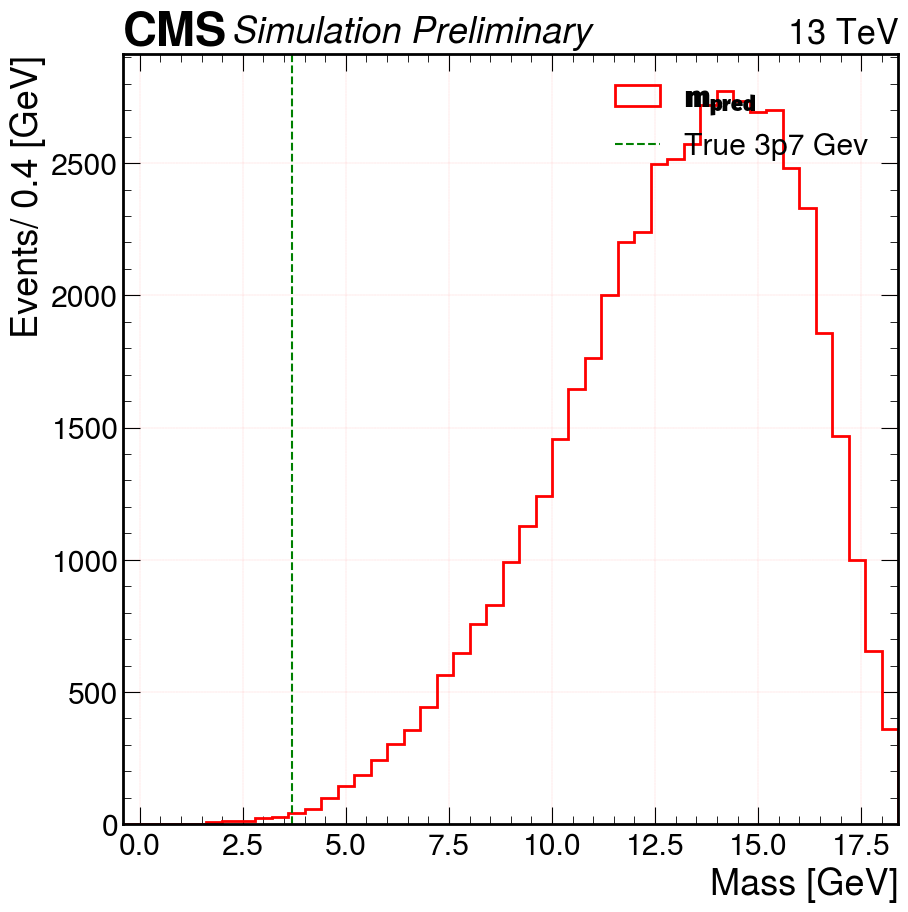

In [50]:
Mass = '3p7'
mass ={'3p7':3.7,'4':4, '6':6, '14':14}.get(Mass, None)
epoch = 300
# file={'3p7':,'4':, '6': '14': }.get(Mass,None)
m_pred_ = []

data_files=data_files_list[-1]

for file in data_files:
   
    infile = open(f"{file}", "rb")
    data = pickle.load(infile)
    infile.close()

   
    m_pred_.append(data["m_pred"])


m_true_ = mass
m_pred_ = np.concatenate(m_pred_)
m0_min = 0.8
m0_max = 17.2
bin_size = 0.4
fig, ax = plt.subplots()
# plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2)
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.axvline(x=mass, linestyle='--', color='green',label=f"True {Mass} Gev")
# plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,.8),)
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
# hep.cms.label(llabel=f"Simulation Preliminary  Epoch {epoch}", rlabel="13 TeV", loc=0, ax=ax)
hep.cms.label(llabel=f"Simulation Preliminary ", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

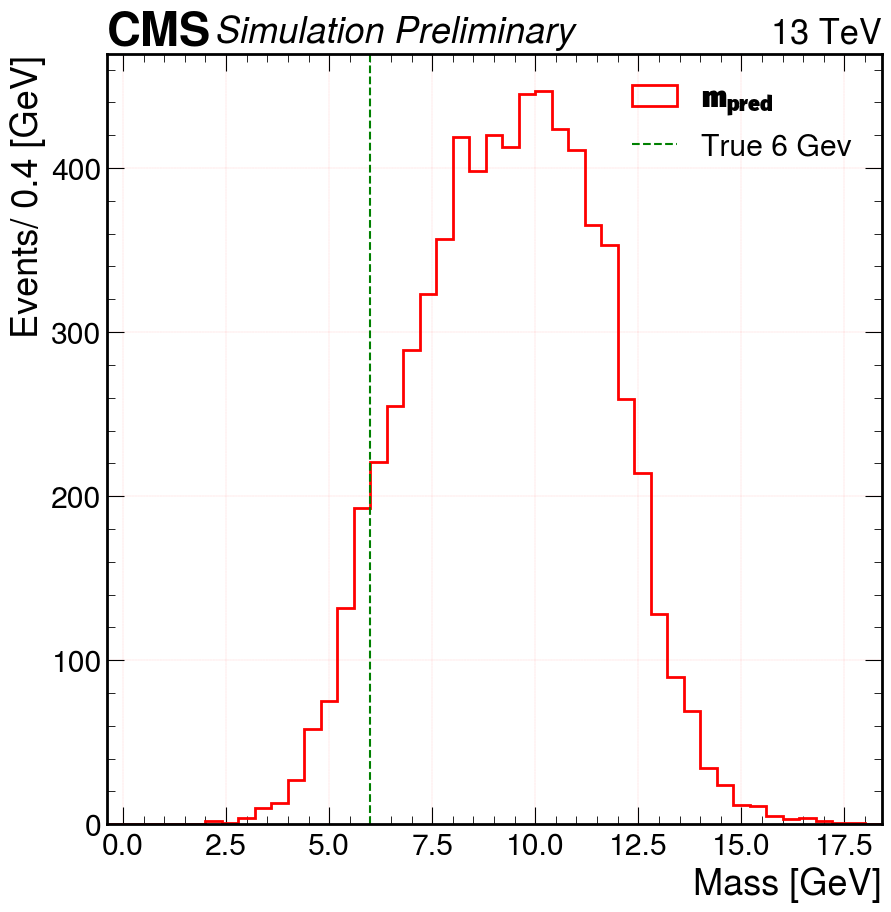

In [13]:
Mass='6'
mass ={'3p7':3.7,'4':4, '6':6, '14':14}.get(Mass, None)
epoch = 300
# file={'3p7':,'4':, '6': '14': }.get(Mass,None)
m_true_, m_pred_ = [], []
# data_files = glob.glob(f"{signal_M14_data_path_ResNet_BN_B3_with_eta_phi}/Inference_data_test_rank_*_epoch_{epoch}_M{Mass}*.pkl")
# data_files=glob.glob(f"/pscratch/sd/b/bbbam/ResNet_B3_with_ieta_iphi_Nodes_4.0_inference_from_Ruchi_data/*Mass_{Mass}*/*/*.pkl")
# data_files=glob.glob(f"/pscratch/sd/b/bbbam/ResNet_B3_with_ieta_iphi_Nodes_4.0_inference_from_Ruchi_data/*Mass_{Mass}*/*/*.pkl")
data_files=glob.glob(f"/pscratch/sd/b/bbbam/ResNet_B3_with_ieta_iphi_Nodes_4.0_inference_from_Ruchi_data/*Mass_{Mass}*/*/*.pkl")

for file in data_files:
   
    infile = open(f"{file}", "rb")
    data = pickle.load(infile)
    infile.close()

    m_true_.append(data["m_true"])
    m_pred_.append(data["m_pred"])


m_true_ = np.concatenate(m_true_)
m_pred_ = np.concatenate(m_pred_)
m0_min = 0.8
m0_max = 17.2
bin_size = 0.4
fig, ax = plt.subplots()
# plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2)
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.axvline(x=mass, linestyle='--', color='green',label=f"True {Mass} Gev")
# plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,.8),)
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
# hep.cms.label(llabel=f"Simulation Preliminary  Epoch {epoch}", rlabel="13 TeV", loc=0, ax=ax)
hep.cms.label(llabel=f"Simulation Preliminary ", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()


### Plotting particular epoch for all Models

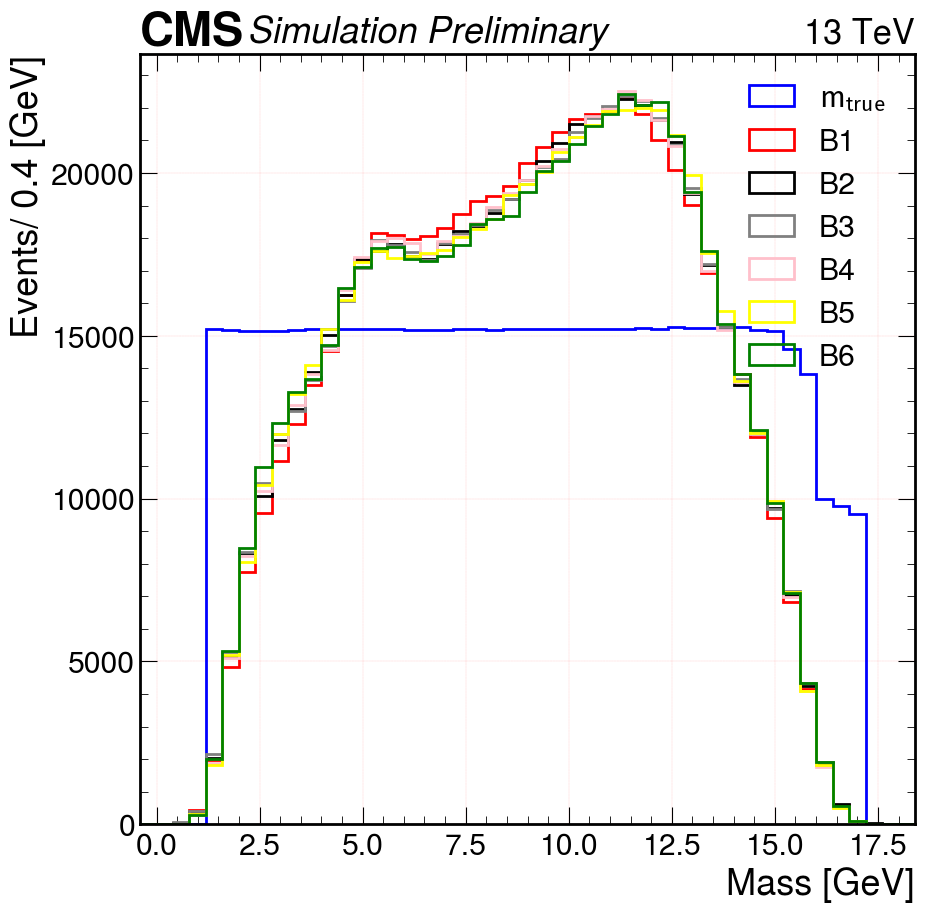

In [83]:


# Define paths
valid_data_paths = [
    "/pscratch/sd/b/bbbam/ResNet_B1_Nodes_4.0/ResNet_B1_13_channel_massregressor_2024_08_19_19:42:18_GPUS_16",
    "/pscratch/sd/b/bbbam/ResNet_B2_Nodes_4.0/ResNet_B2_13_channel_massregressor_2024_08_19_19:45:54_GPUS_16/",
    "/pscratch/sd/b/bbbam/ResNet_B3_Nodes_4.0/ResNet_B3_13_channel_massregressor_2024_08_12_08:48:02_GPUS_16/",
    "/pscratch/sd/b/bbbam/ResNet_B4_Nodes_4.0/ResNet_B4_13_channel_massregressor_2024_08_19_19:59:10_GPUS_16",
    "/pscratch/sd/b/bbbam/ResNet_B5_Nodes_4.0/ResNet_B5_13_channel_massregressor_2024_08_19_20:04:19_GPUS_16",
    "/pscratch/sd/b/bbbam/ResNet_B6_Nodes_4.0/ResNet_B6_13_channel_massregressor_2024_08_19_20:14:03_GPUS_16/"
]

epoch = 300
M_pred = []
M_true = []

# Loop over each path and gather data
for valid_data in valid_data_paths:
    m_true_, m_pred_ = [], []
    data_files = glob.glob(f"{valid_data}/valid_data_epoch_{epoch}/*.pkl")
    for file in data_files:
        with open(file, "rb") as infile:
            data = pickle.load(infile)
        m_true_.append(data["m_true"])
        m_pred_.append(data["m_pred"])

    m_true_ = np.concatenate(m_true_)
    m_pred_ = np.concatenate(m_pred_)
    
    M_pred.append(m_pred_)
    M_true.append(m_true_)

# Plotting
m0_min = 0.8
m0_max = 17.2
bin_size = 0.4
fig, ax = plt.subplots()

# Plotting true mass
plt.hist(M_true[0], range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(M_pred[0], range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'B1', linestyle='-', color='red', linewidth=2)
plt.hist(M_pred[1], range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'B2', linestyle='-', color='black', linewidth=2)
plt.hist(M_pred[2], range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'B3', linestyle='-', color='grey', linewidth=2)
plt.hist(M_pred[3], range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'B4', linestyle='-', color='pink', linewidth=2)
plt.hist(M_pred[4], range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'B5', linestyle='-', color='yellow', linewidth=2)
plt.hist(M_pred[5], range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'B6', linestyle='-', color='green', linewidth=2)

plt.xlim(m0_min-1.2,m0_max+1.2)
# plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,.8),)
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel=f"Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()


In [75]:
len(M_pred)

6

In [15]:
# m_pred_ = 17.2*sigmoid(m_pred_/17.2)
# plt.hist(m_true_,  histtype='step', color='b')
# plt.hist(m_pred_,  histtype='step', color='r')

In [9]:
paths=np.sort(glob.glob(f'/pscratch/sd/b/bbbam/resnet34_modi_final_Model_testing_Nodes_1.0/13_channels_massregressor_multi_node_inference_Mass_*/test_data_epoch_73/*'))
paths

array(['/pscratch/sd/b/bbbam/resnet34_modi_final_Model_testing_Nodes_1.0/13_channels_massregressor_multi_node_inference_Mass_12_2024_07_16_13:47:59_GPUS_4/test_data_epoch_73/Inference_data_test_rank_0_epoch_73_M3p7.pkl',
       '/pscratch/sd/b/bbbam/resnet34_modi_final_Model_testing_Nodes_1.0/13_channels_massregressor_multi_node_inference_Mass_12_2024_07_16_13:47:59_GPUS_4/test_data_epoch_73/Inference_data_test_rank_1_epoch_73_M3p7.pkl',
       '/pscratch/sd/b/bbbam/resnet34_modi_final_Model_testing_Nodes_1.0/13_channels_massregressor_multi_node_inference_Mass_12_2024_07_16_13:47:59_GPUS_4/test_data_epoch_73/Inference_data_test_rank_2_epoch_73_M3p7.pkl',
       '/pscratch/sd/b/bbbam/resnet34_modi_final_Model_testing_Nodes_1.0/13_channels_massregressor_multi_node_inference_Mass_12_2024_07_16_13:47:59_GPUS_4/test_data_epoch_73/Inference_data_test_rank_3_epoch_73_M3p7.pkl',
       '/pscratch/sd/b/bbbam/resnet34_modi_final_Model_testing_Nodes_1.0/13_channels_massregressor_multi_node_infere

# for testing signal

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation Preliminary'))

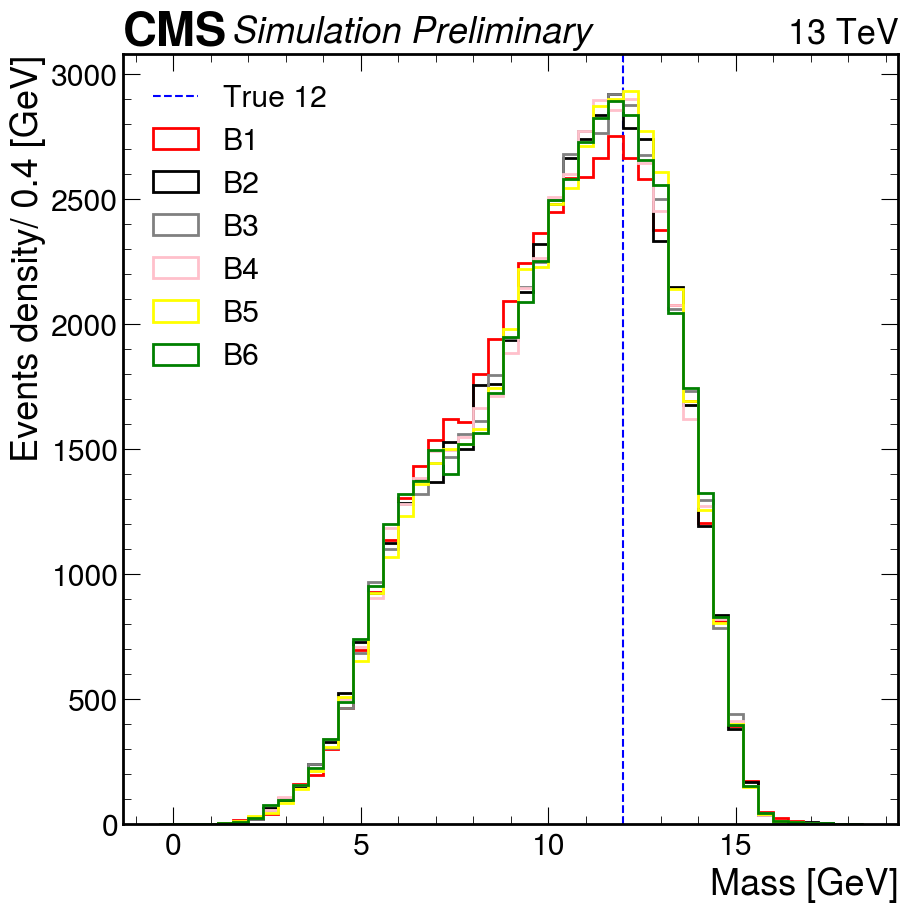

In [112]:
Mass = '12'
Epoch = 300

# Define paths
test_data_paths = [
    "/pscratch/sd/b/bbbam/ResNet_B1_Nodes_4.0",
    "/pscratch/sd/b/bbbam/ResNet_B2_Nodes_4.0",
    "/pscratch/sd/b/bbbam/ResNet_B3_Nodes_4.0",
    "/pscratch/sd/b/bbbam/ResNet_B4_Nodes_4.0",
    "/pscratch/sd/b/bbbam/ResNet_B5_Nodes_4.0",
    "/pscratch/sd/b/bbbam/ResNet_B6_Nodes_4.0"
]


M_pred = []
M_true = []
mass  = {'3p7':3.7,'4':4, '5':5, '6':6, '8':8, '10':10, '12':12, '14':14}.get(Mass, None)
# Loop over each path and gather data
for test_data in test_data_paths:
    m_true_, m_pred_ = [], []
    data_files = glob.glob(f"{test_data}/13_channels_massregressor_multi_node_inference_Mass_{Mass}*/test_data_epoch_{Epoch}_M{Mass}/Inference_data_test*epoch_{Epoch}_M{Mass}*.pkl")
    for file in data_files:
        with open(file, "rb") as infile:
            data = pickle.load(infile)
        m_true_.append(data["m_true"])
        m_pred_.append(data["m_pred"])
    m_true_ = np.concatenate(m_true_)
    m_pred_ = np.concatenate(m_pred_)
    
    M_pred.append(m_pred_)
    M_true.append(m_true_)

# Plotting
m0_min = 0.8
m0_max = 17.2
bin_size = 0.4
fig, ax = plt.subplots()

# Plotting true mass
plt.axvline(x= mass,linestyle='--',label=f'True {mass}', color='blue')
plt.hist(M_pred[0], range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'B1', linestyle='-', color='red', linewidth=2)
plt.hist(M_pred[1], range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'B2', linestyle='-', color='black', linewidth=2)
plt.hist(M_pred[2], range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'B3', linestyle='-', color='grey', linewidth=2)
plt.hist(M_pred[3], range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'B4', linestyle='-', color='pink', linewidth=2)
plt.hist(M_pred[4], range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'B5', linestyle='-', color='yellow', linewidth=2)
plt.hist(M_pred[5], range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'B6', linestyle='-', color='green', linewidth=2)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events density/ 0.4 [GeV]')
plt.legend(loc='best')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)


In [97]:
test_data

'/pscratch/sd/b/bbbam/ResNet_B1_Nodes_4.0'

In [2]:
Epoch = 300
Mass = '3p7'
mass  = {'3p7':3.7,'4':4, '5':5, '6':6, '8':8, '10':10, '12':12, '14':14}.get(Mass, None)
print(mass)
paths=np.sort(glob.glob(f"{test_data_paths[0]}/13_channels_massregressor_multi_node_inference_Mass_{Mass}*/test_data_epoch_{Epoch}_M{Mass}/Inference_data_test*epoch_{Epoch}_M{Mass}*.pkl"))
assert len(paths) > 0
print(f"{len(paths)} files found")
# epoch=6
m_true_ =[]
m_pred_ =[]

for data_file in paths:
    infile = open(f"{data_file}", "rb")
    data = pickle.load(infile)
    # print(f"loaded data file ------>  {data_file}")
    infile.close()

    m_true_.append( data["m_true"])
    m_pred_.append( data["m_pred"])
m_true_ = np.concatenate(m_true_)
m_pred_ = np.concatenate(m_pred_)  
print("true mass", np.mean(m_true_))
# data_file = paths[0]
# infile = open(f"{data_file}", "rb")
# data = pickle.load(infile)
# print(f"loaded data file ------>  {data_file}")
# infile.close()

# m_true_ = data["m_true"]
# m_pred_ = data["m_pred"]

m0 = 1.2
m0_max = 17.2
bin_size=0.4
mu, std = norm.fit(m_pred_)
x = np.linspace(0,m0_max+1.2, num=1000)
y = norm.pdf(x, mu, std)

fig, ax = plt.subplots()
plt.hist(np.array(m_pred_).flatten(),density=True, range=(0,m0_max+1.2), bins=len(np.arange(0,m0_max+1.2,bin_size)), histtype='step',  linestyle='-', color='b', linewidth=2)
plt.plot(x, y,linestyle='--', color='red',label=f'E2E mu:{mu:.2f}  std:{std:.2f}')
plt.axvline(x= mass,linestyle='--',label=f'True {mass}')
plt.xlabel('Mass [GeV]')
plt.ylabel('Events density/ 0.4 [GeV]')
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mt

3.7


NameError: name 'test_data_paths' is not defined

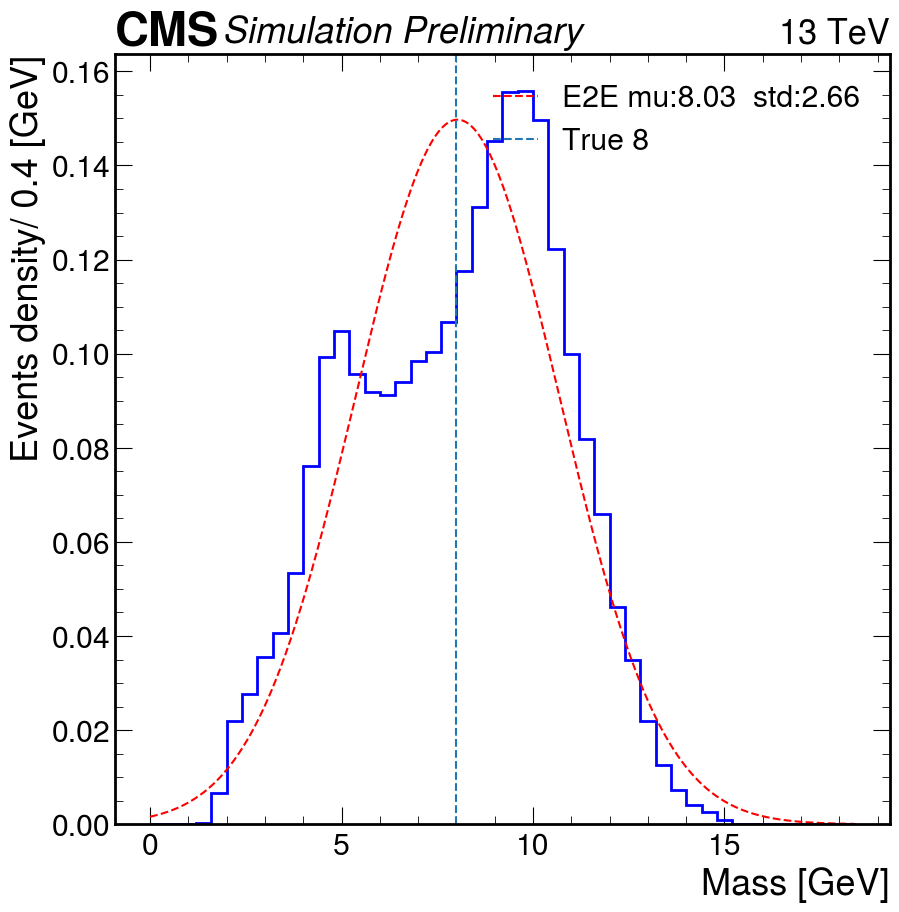

In [71]:
# mass = 3.7
ru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

In [59]:
Mass = '3p7'
mass  = {'3p7':3.7,'4':4, '5':5, '6':6, '8':8, '10':10, '12':12, '14':14}.get(Mass, None)
print(mass)
inf_data = glob.glob(f"/global/homes/b/bbbam/ResNet_reg/13_ch_massregressor_ResNet/INFERENCE_DATA_test/Mass_{mass}_*")
print(inf_data[0])
infile = open(f"{inf_data[0]}", "rb")
data = pickle.load(infile)
infile.close()

m_true_=(data["m_true"])
m_pred_=(data["m_pred"])

m_pred_1 =[]
m_pred_2 =[]
for i in range(len(m_pred_)):
    # if i==0: continue
    if i%2: m_pred_1.append(m_pred_[i])
    else: m_pred_2.append(m_pred_[i])
m0_min = 0.8
m0_max = 17.2
bin_size = 0.4
fig, ax = plt.subplots(figsize=(15,12), dpi=150)
plt.hist2d(np.squeeze(m_pred_1), np.squeeze(m_pred_2), bins=[np.arange(m0_min-0.8, m0_max+1.2, .4), np.arange(m0_min-0.8, m0_max+1.2, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{A_{1}}$ [GeV]')
plt.ylabel(r'$\mathrm{A_{2}}$ [GeV]')
plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
# plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=12)
# plt.yticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=12)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
plt.grid(color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel=f"Simulation Preliminary A Mass {mass} GeV", rlabel="13 TeV", loc=0, ax=ax)
plt.savefig(f'A_Mass_{mass} GeV.png', bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()    

3.7
/global/homes/b/bbbam/ResNet_reg/13_ch_massregressor_ResNet/INFERENCE_DATA_test/Mass_3.7_epoch6__mae2.0021_inference_data.pkl


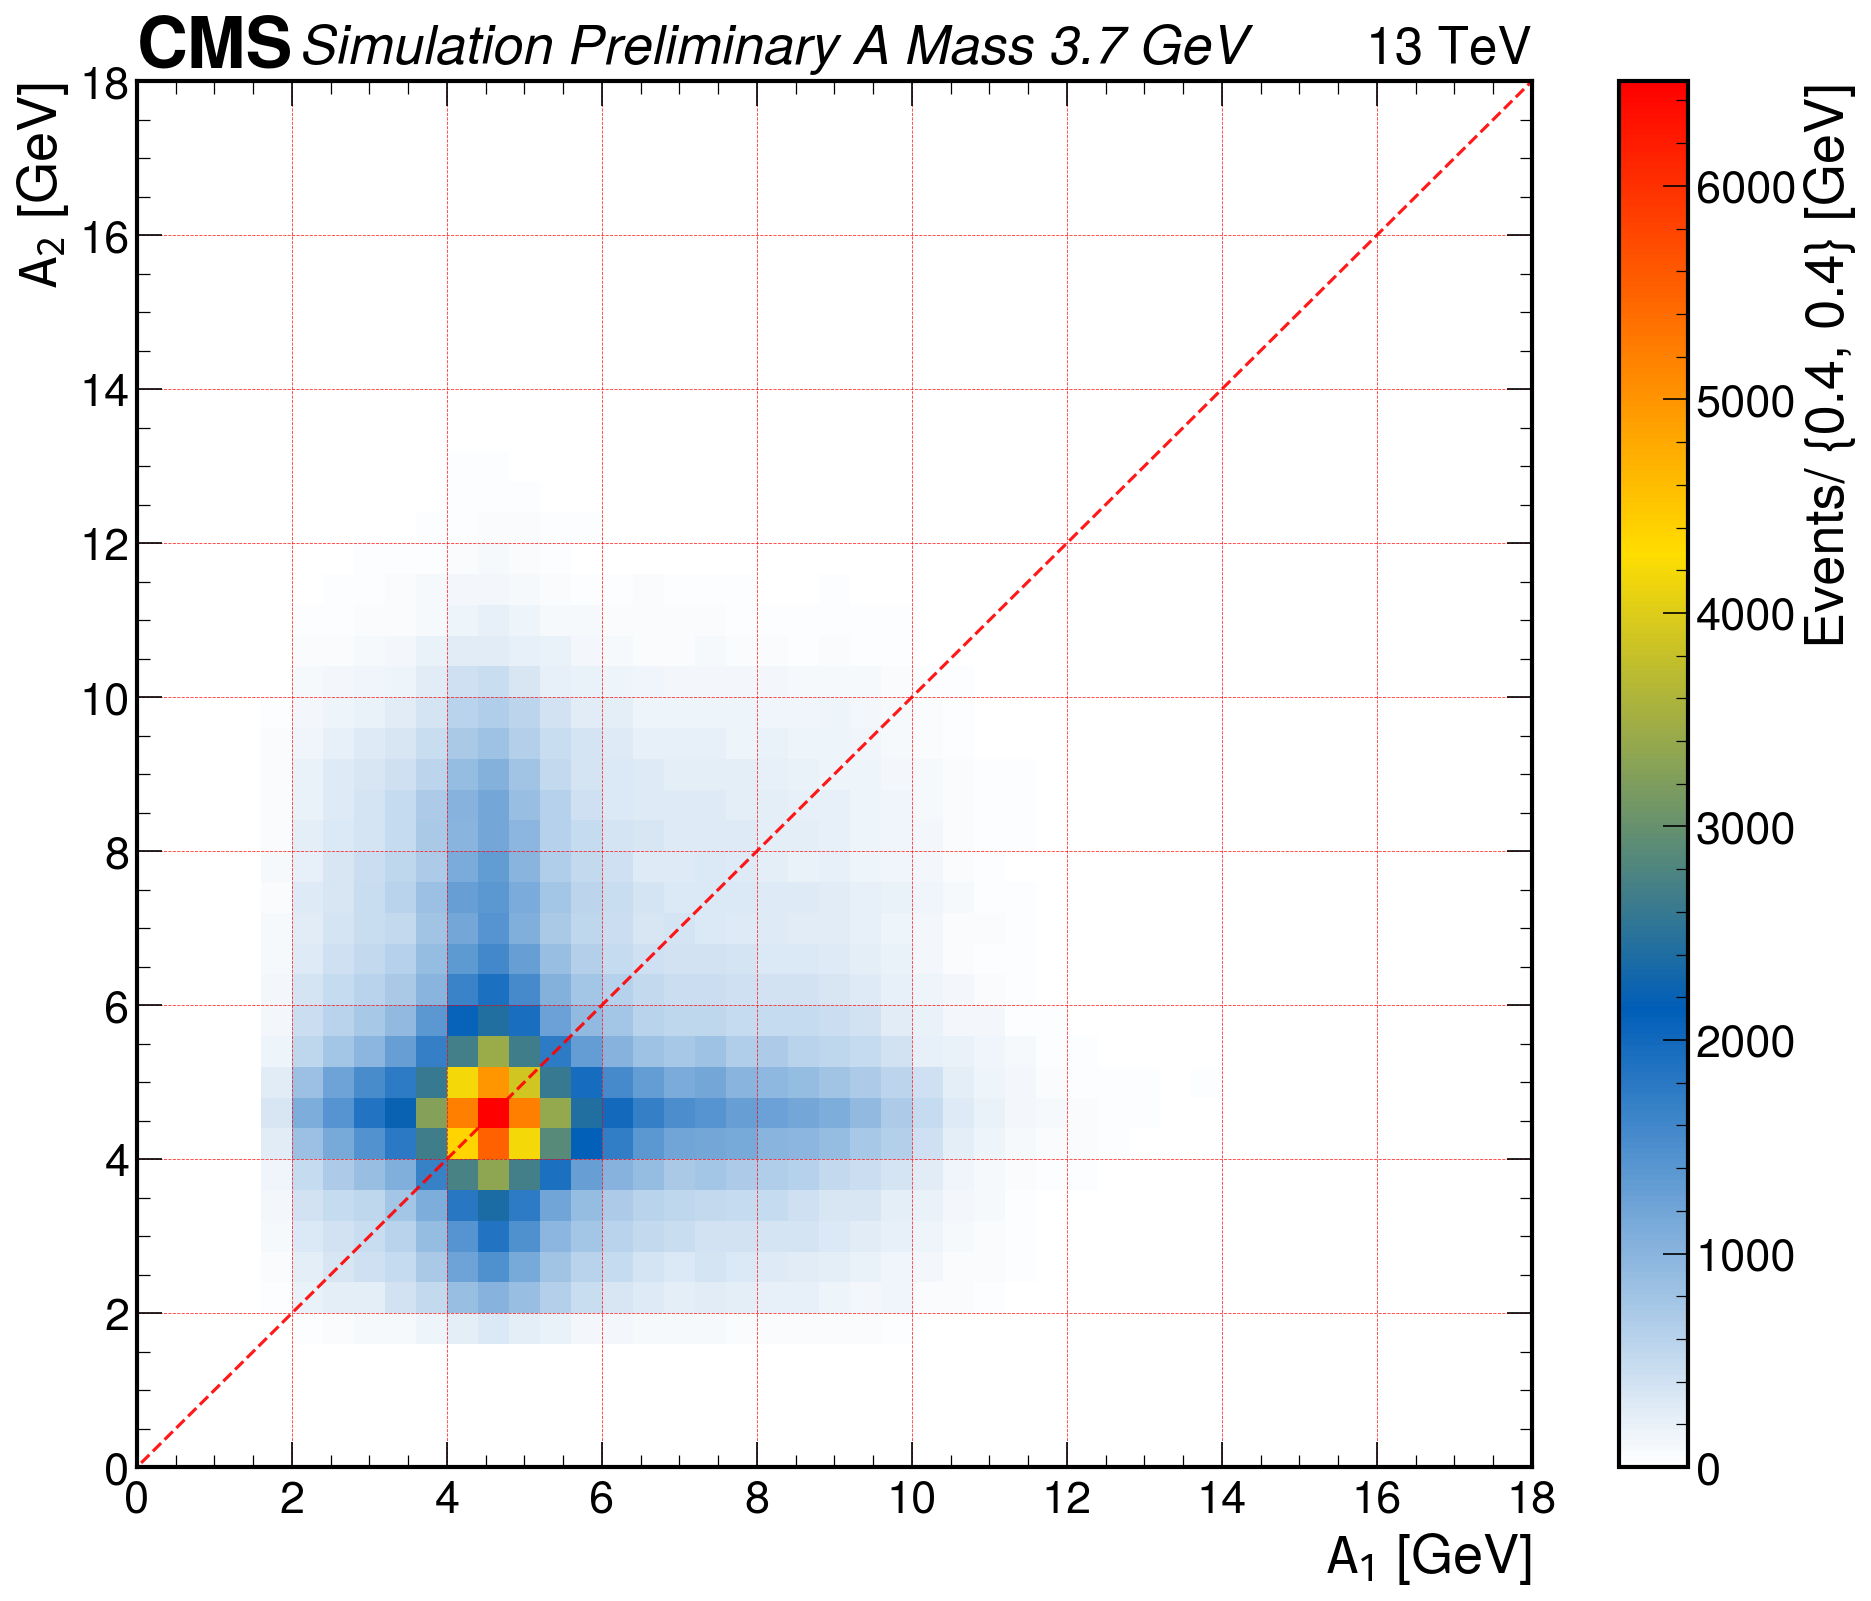

In [22]:
m_true_

array([[3.6999981],
       [3.699998 ],
       [3.700001 ],
       ...,
       [3.7000046],
       [3.6999998],
       [3.6999998]], dtype=float32)

In [24]:
2%2

0